In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
import numpy as np

# Load the text file containing the sentences.

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
lines = []
with open('/content/drive/MyDrive/sentiment labelled sentences/imdb_labelled.txt') as theFile1:
  for y in theFile1:
        lines.append(y.rstrip('\n'))
print(len(lines))
'''
with open('/content/drive/MyDrive/sentiment labelled sentences/amazon_cells_labelled.txt') as theFile2:
  for y in theFile2:
        lines.append(y.rstrip('\n'))
print(len(lines))
with open('/content/drive/MyDrive/sentiment labelled sentences/yelp_labelled.txt') as theFile3:
    for y in theFile3:
        lines.append(y.rstrip('\n'))
'''
print(len(lines))
print(lines[0])

# Create empty lists to store sentences and labels
sentences = []
labels = []

# Separate sentences and labels
sentences, labels = zip(*[line.split('\t') for line in lines])

print(sentences[0])
print(labels[0])


1000
1000
A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  	0
A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
0


# Import and Test Model

In [35]:
from transformers import pipeline

# Sentiment analysis using Hugging Face pipeline
sent_pipeline = pipeline("sentiment-analysis", padding=True, truncation=True)

results=[]
for i in range(len(sentences)):
  result = sent_pipeline(sentences[i])
  results.append(result)





No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [36]:
print(results)

[[{'label': 'NEGATIVE', 'score': 0.99899822473526}], [{'label': 'NEGATIVE', 'score': 0.9997989535331726}], [{'label': 'NEGATIVE', 'score': 0.9997277855873108}], [{'label': 'NEGATIVE', 'score': 0.9996671676635742}], [{'label': 'POSITIVE', 'score': 0.9757773876190186}], [{'label': 'NEGATIVE', 'score': 0.9997761845588684}], [{'label': 'NEGATIVE', 'score': 0.9996920824050903}], [{'label': 'POSITIVE', 'score': 0.9993072748184204}], [{'label': 'NEGATIVE', 'score': 0.9997854828834534}], [{'label': 'POSITIVE', 'score': 0.9998314380645752}], [{'label': 'POSITIVE', 'score': 0.9997826218605042}], [{'label': 'POSITIVE', 'score': 0.9998267292976379}], [{'label': 'POSITIVE', 'score': 0.9998658895492554}], [{'label': 'POSITIVE', 'score': 0.9998505115509033}], [{'label': 'POSITIVE', 'score': 0.9998089671134949}], [{'label': 'NEGATIVE', 'score': 0.9993290901184082}], [{'label': 'POSITIVE', 'score': 0.9996761083602905}], [{'label': 'NEGATIVE', 'score': 0.6097548007965088}], [{'label': 'POSITIVE', 'score

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Extract binary labels from the nested structure
predicted_labels = [result[0]['label'] == 'POSITIVE' for result in results]

predicted_labels_numeric = [1 if label else 0 for label in binary_labels]

# Display binary labels
print(predicted_labels_numeric)

labels=list(labels)
numeric_labels = [int(value) for value in labels]

# Calculate and print test accuracy
test_accuracy = accuracy_score(numeric_labels , predicted_labels_numeric)
print(f"Test Accuracy: {test_accuracy:.2%}")

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(numeric_labels , predicted_labels_numeric))

print("Confusion Matrix:")
print(confusion_matrix(numeric_labels , predicted_labels_numeric))

[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 

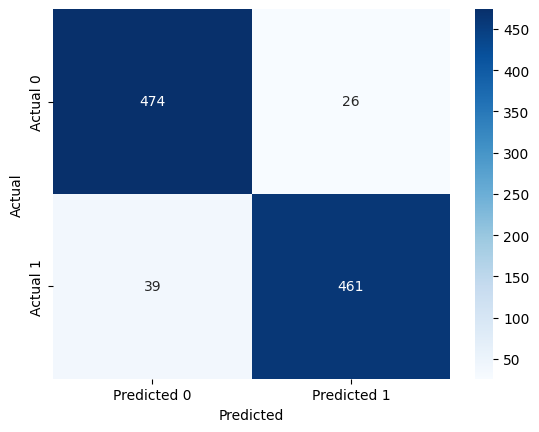

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have numeric labels and predicted numeric labels
# numeric_labels = [...]
# predicted_labels_numeric = [...]

# Calculate confusion matrix
conf_matrix = confusion_matrix(numeric_labels, predicted_labels_numeric)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()